In [98]:
import pandas as pd
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [99]:
# for palette_name in sns.palettes.SEABORN_PALETTES.keys():
#     sns.palplot(sns.color_palette(palette_name))
#     plt.title(palette_name)
#     plt.show()

In [100]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [101]:
def get_data(path:str)->Dict[str, pd.DataFrame]:
  dfs = {}
  for i in range(2012, 2025):
      dfs[f"sheet-{i}"] = pd.read_excel(path, sheet_name=f"{i}")
  return dfs

In [102]:
dfs = get_data("Cuadro Edesur Clean.xlsx")

In [103]:
df = pd.concat(dfs.values(), ignore_index=True)

In [104]:
df.isna().sum()

Empresa Distribuidora    0
Tipo Cliente             0
Medida                   0
Valor                    0
Mes                      0
Año                      0
dtype: int64

In [105]:
df.head()

,Empresa Distribuidora,Tipo Cliente,Medida,Valor,Mes,Año
0,EdeEste,EdeEste,Energía (gwh),134.718079,1,2012
1,EdeEste,EdeEste,Potencia (mw),250.725040,1,2012
2,EdeEste,Ayuntamiento,Energía (gwh),5.455723,1,2012
3,EdeEste,Ayuntamiento,Potencia (mw),17.607010,1,2012
4,EdeEste,Gobierno,Energía (gwh),16.104871,1,2012


In [106]:
display(df["Tipo Cliente"].value_counts())

display(df["Empresa Distribuidora"].value_counts())

Tipo Cliente
Ayuntamiento    936
Comercial       936
Gobierno        936
Residencial     936
Industrial      864
EdeEste         312
EdeSur          312
EdeNorte        312
Industrial       72
Name: count, dtype: int64

Empresa Distribuidora
EdeEste     1872
EdeSur      1872
EdeNorte    1872
Name: count, dtype: int64

In [107]:
df['Tipo Cliente'] = df['Tipo Cliente'].str.strip()

In [108]:
# Filtrar filas  donde 'Tipo Cliente' es lo mismo que 'Empresa Distribuidora'
initial_row_count = len(df)
df = df[df['Tipo Cliente'] != df['Empresa Distribuidora']].copy()
print(f"Removed {initial_row_count - len(df)} rows where Tipo Cliente matched Empresa Distribuidora.")

Removed 936 rows where Tipo Cliente matched Empresa Distribuidora.


In [109]:
df.tail()

,Empresa Distribuidora,Tipo Cliente,Medida,Valor,Mes,Año
5611,EdeNorte,Industrial,Potencia (mw),266.335464,12,2024
5612,EdeNorte,Comercial,Energía (gwh),69.548904,12,2024
5613,EdeNorte,Comercial,Potencia (mw),151.311702,12,2024
5614,EdeNorte,Residencial,Energía (gwh),189.698934,12,2024
5615,EdeNorte,Residencial,Potencia (mw),92.975087,12,2024


In [110]:
def transform_date(month, year):
    return f"{year}-{month:02d}"

In [111]:
df["date"] = pd.to_datetime(df.apply(lambda x: transform_date(x["Mes"], x["Año"]), axis=1))
df

,Empresa Distribuidora,Tipo Cliente,Medida,Valor,Mes,Año,date
2,EdeEste,Ayuntamiento,Energía (gwh),5.455723,1,2012,2012-01-01
3,EdeEste,Ayuntamiento,Potencia (mw),17.607010,1,2012,2012-01-01
4,EdeEste,Gobierno,Energía (gwh),16.104871,1,2012,2012-01-01
5,EdeEste,Gobierno,Potencia (mw),0.406150,1,2012,2012-01-01
6,EdeEste,Industrial,Energía (gwh),18.802130,1,2012,2012-01-01
...,...,...,...,...,...,...,...
5611,EdeNorte,Industrial,Potencia (mw),266.335464,12,2024,2024-12-01
5612,EdeNorte,Comercial,Energía (gwh),69.548904,12,2024,2024-12-01
5613,EdeNorte,Comercial,Potencia (mw),151.311702,12,2024,2024-12-01
5614,EdeNorte,Residencial,Energía (gwh),189.698934,12,2024,2024-12-01


In [112]:
df = df.pivot_table(
    index=["Empresa Distribuidora", "Tipo Cliente", "Mes", "Año", "date"],
    columns="Medida",
    values="Valor"
).reset_index()
df.columns.name = None

In [113]:
df["Tipo Cliente"].value_counts()

Tipo Cliente
Ayuntamiento    468
Comercial       468
Gobierno        468
Industrial      468
Residencial     468
Name: count, dtype: int64

**Descripción de las Características:**

*   **Empresa Distribuidora:** La compañía de distribución de electricidad (EdeEste, EdeNorte o EdeSur).
*   **Tipo Cliente:** El tipo de cliente (por ejemplo, Ayuntamiento, Gobierno, Industrial, Comercial, Residencial).
*   **Mes:** El mes del punto de datos.
*   **Año:** El año del punto de datos.
*   **date:** Una columna combinada que representa el año y el mes (AAAA-MM) para facilitar el análisis de series de tiempo.
*   **Energía (gwh):** La energía consumida en gigavatios-hora (gwh).
*   **Potencia (mw):** La potencia demandada en megavatios (mw).

**Por qué la Energía y la Potencia se tratan individualmente:**

'Energía (gwh)' y 'Potencia (mw)' representan diferentes aspectos del uso de la electricidad. La energía es la cantidad total de electricidad consumida durante un período, mientras que la potencia es la tasa a la que se consume o entrega electricidad en un momento específico. Analizarlas por separado nos permite comprender tendencias y patrones distintos relacionados con el volumen de consumo frente a la demanda máxima, lo cual puede ser crucial para diferentes tipos de análisis, como el diseño de tarifas, la planificación de infraestructura o la previsión de carga. Combinarlas directamente no tendría un significado físico, por lo que es más apropiado analizarlas como variables separadas, aunque potencialmente relacionadas.

In [114]:
df.duplicated().sum() # Verificamos que no hayan valores duplicados.

np.int64(0)

In [115]:
df.groupby(["Empresa Distribuidora", "Tipo Cliente", "Año"]).agg(
    {
        "Energía (gwh)": "sum",
        "Potencia (mw)": "sum"
    }
)

Energía (gwh)  Potencia (mw)
Empresa Distribuidora Tipo Cliente Año                               
EdeEste               Ayuntamiento 2012      73.380664     187.924220
                                   2013      76.338730     188.016580
                                   2014      87.543426     190.500950
                                   2015      94.491985     192.916460
                                   2016      98.484510     198.237730
...                                                ...            ...
EdeSur                Residencial  2020    1826.487234     387.091086
                                   2021    1702.409684     440.595549
                                   2022    1813.918557     583.125405
                                   2023    2045.120000     686.190000
                                   2024    2146.577886     661.354908

[195 rows x 2 columns]

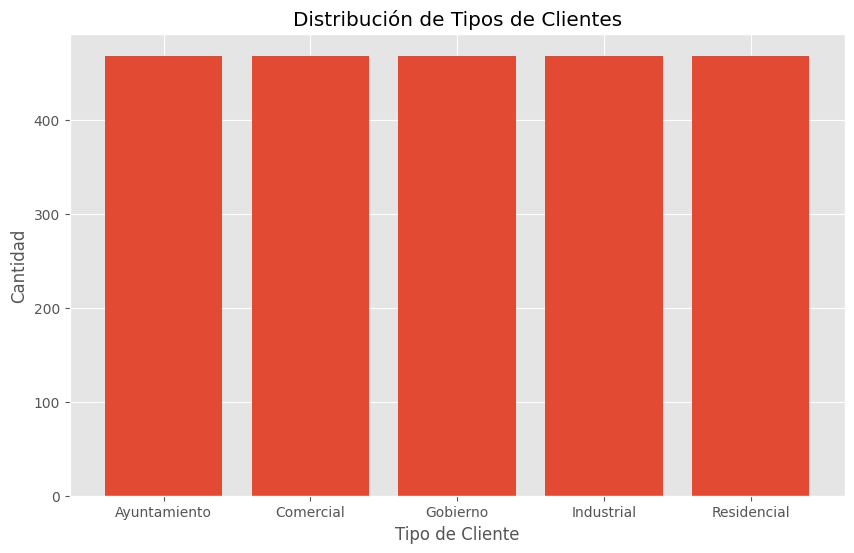

In [116]:
tipo_clientes = df["Tipo Cliente"].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(tipo_clientes.index, tipo_clientes.values)

ax.set(
    title="Distribución de Tipos de Clientes",
    xlabel="Tipo de Cliente",
    ylabel="Cantidad"
)

plt.show()

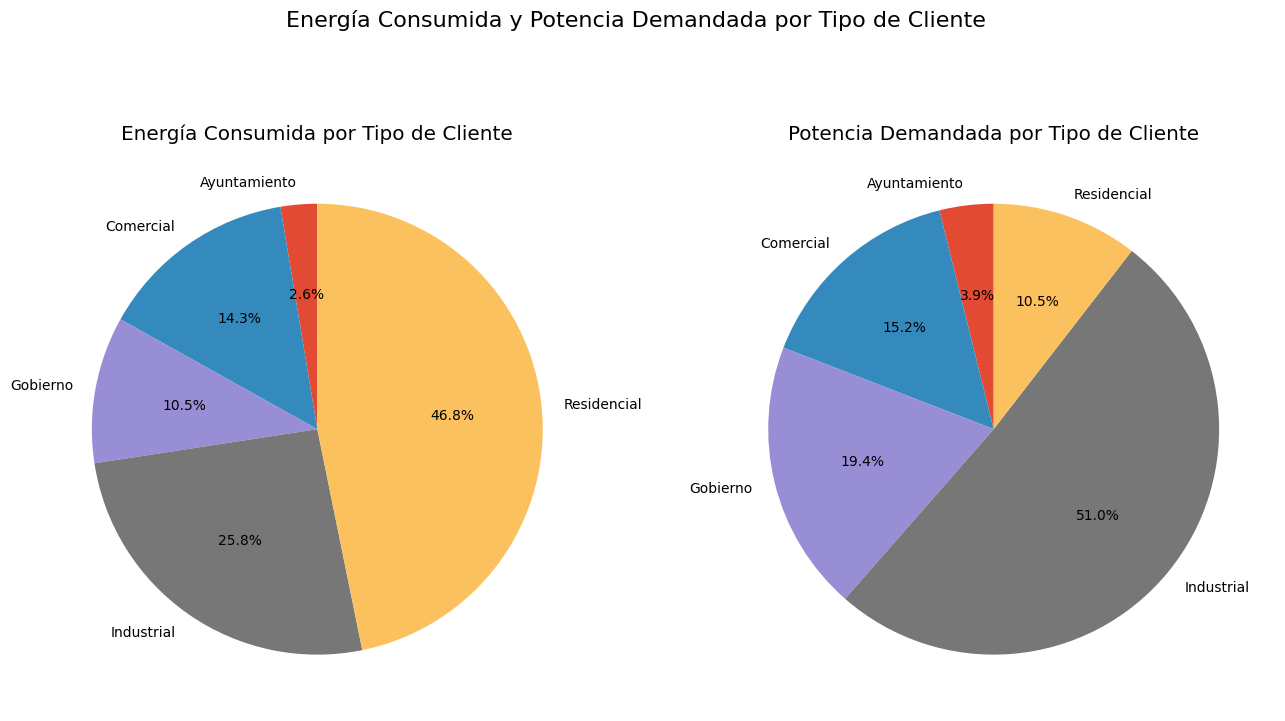

In [117]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16, 8))


por_tipo_empresa = df.groupby(["Tipo Cliente"]).agg(
    {
        "Energía (gwh)": "sum",
        "Potencia (mw)": "sum"
    }
)


ax1.pie(
    por_tipo_empresa["Energía (gwh)"],
    labels=por_tipo_empresa.index,
    autopct="%1.1f%%",
    startangle=90
)

ax1.set(title="Energía Consumida por Tipo de Cliente")


ax2.pie(
    por_tipo_empresa["Potencia (mw)"],
    labels=por_tipo_empresa.index,
    autopct="%1.1f%%",
    startangle=90
    )

ax2.set(title="Potencia Demandada por Tipo de Cliente")


plt.suptitle(
    "Energía Consumida y Potencia Demandada por Tipo de Cliente",
    fontsize=16,
    y=1.02
)

plt.show()

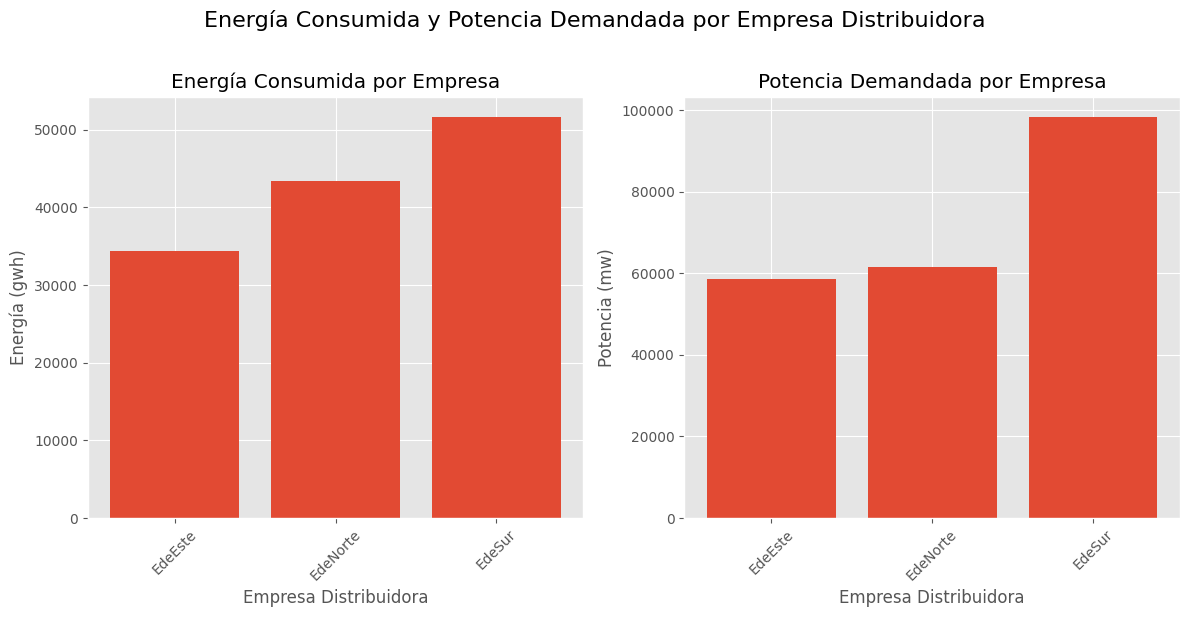

In [118]:
by_companies = df.groupby(["Empresa Distribuidora"]).agg(
    {
        "Energía (gwh)": "sum",
        "Potencia (mw)": "sum"
    }
)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

ax1.bar(by_companies.index, by_companies["Energía (gwh)"])

ax1.set(
    title="Energía Consumida por Empresa",
    xlabel="Empresa Distribuidora",
    ylabel="Energía (gwh)"
)

ax1.tick_params(axis='x', rotation=45)

ax2.bar(by_companies.index, by_companies["Potencia (mw)"])


ax2.set(
    title="Potencia Demandada por Empresa",
    xlabel="Empresa Distribuidora",
    ylabel="Potencia (mw)"
)

ax2.tick_params(axis='x', rotation=45)


plt.suptitle(
    "Energía Consumida y Potencia Demandada por Empresa Distribuidora",
    fontsize=16,
    y=1.02
)

plt.tight_layout()
plt.show()

Observaciones Encontradas:

Vemos evidenciado que en parte del sur, sobre todo el tiempo se ve un mayor consumo de Energía y potencia demandada por Empresa. Pero podemos indagar más aver que zonas de las regiones o que tipo de cliente están haciendo la diferencia en el sur.

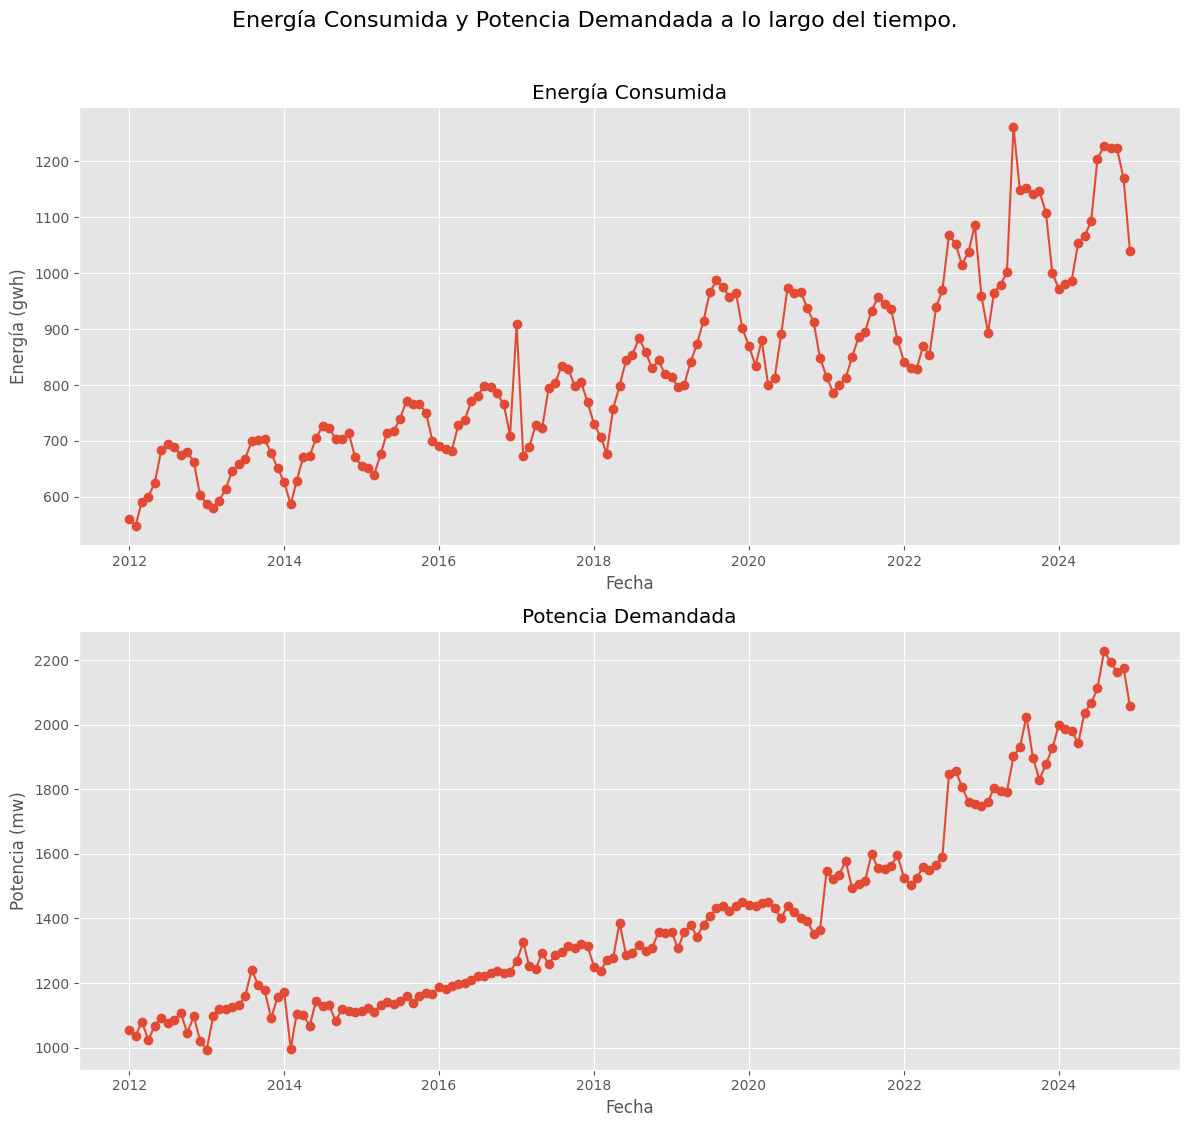

In [119]:
across_all = df.groupby("date").agg(
    {
        "Energía (gwh)": "sum",
        "Potencia (mw)": "sum"
    }
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 11))


ax1.plot(across_all.index, across_all["Energía (gwh)"], marker="o", linestyle="-")
ax1.set(
    title="Energía Consumida",
    xlabel="Fecha",
    ylabel="Energía (gwh)"
)


ax2.plot(across_all.index, across_all["Potencia (mw)"], marker="o", linestyle="-")
ax2.set(
    title="Potencia Demandada",
    xlabel="Fecha",
    ylabel="Potencia (mw)"
)

plt.suptitle(
    "Energía Consumida y Potencia Demandada a lo largo del tiempo.",
    fontsize=16,
    y=1.02
)

plt.tight_layout()

plt.show()

Observaciones:

**General**
Podemos apreciar que durante cada dos años fluctua la energía consumida pero a mediados de cada año aumenta el consumo, esto puede ser debido a el alto calor (Verano).


**Energía**
Crecimiento Acelerado: Se nota un salto importante y una aceleración en el crecimiento a partir de mediados de 2022. Los picos y los valles a partir de esa fecha son mucho más altos que en los años anteriores.

Más allá de las fluctuaciones, la línea base del consumo sube constantemente. El consumo de 2024 es significativamente mayor que el de 2012, lo que indica un crecimiento económico y/o poblacional del país.


---*---8-------


**Potencia**
Menor Estacionalidad, Mayor Crecimiento: Aunque también sube en verano, su principal característica no es la fluctuación, sino la escalada constante. Esto presiona directamente la capacidad de generación del país.

El Gran Salto de 2022: Al igual que en el gráfico de energía, a mediados de 2022 hay un "escalón" o un punto de inflexión donde la demanda máxima comienza a crecer a un ritmo mucho más rápido.

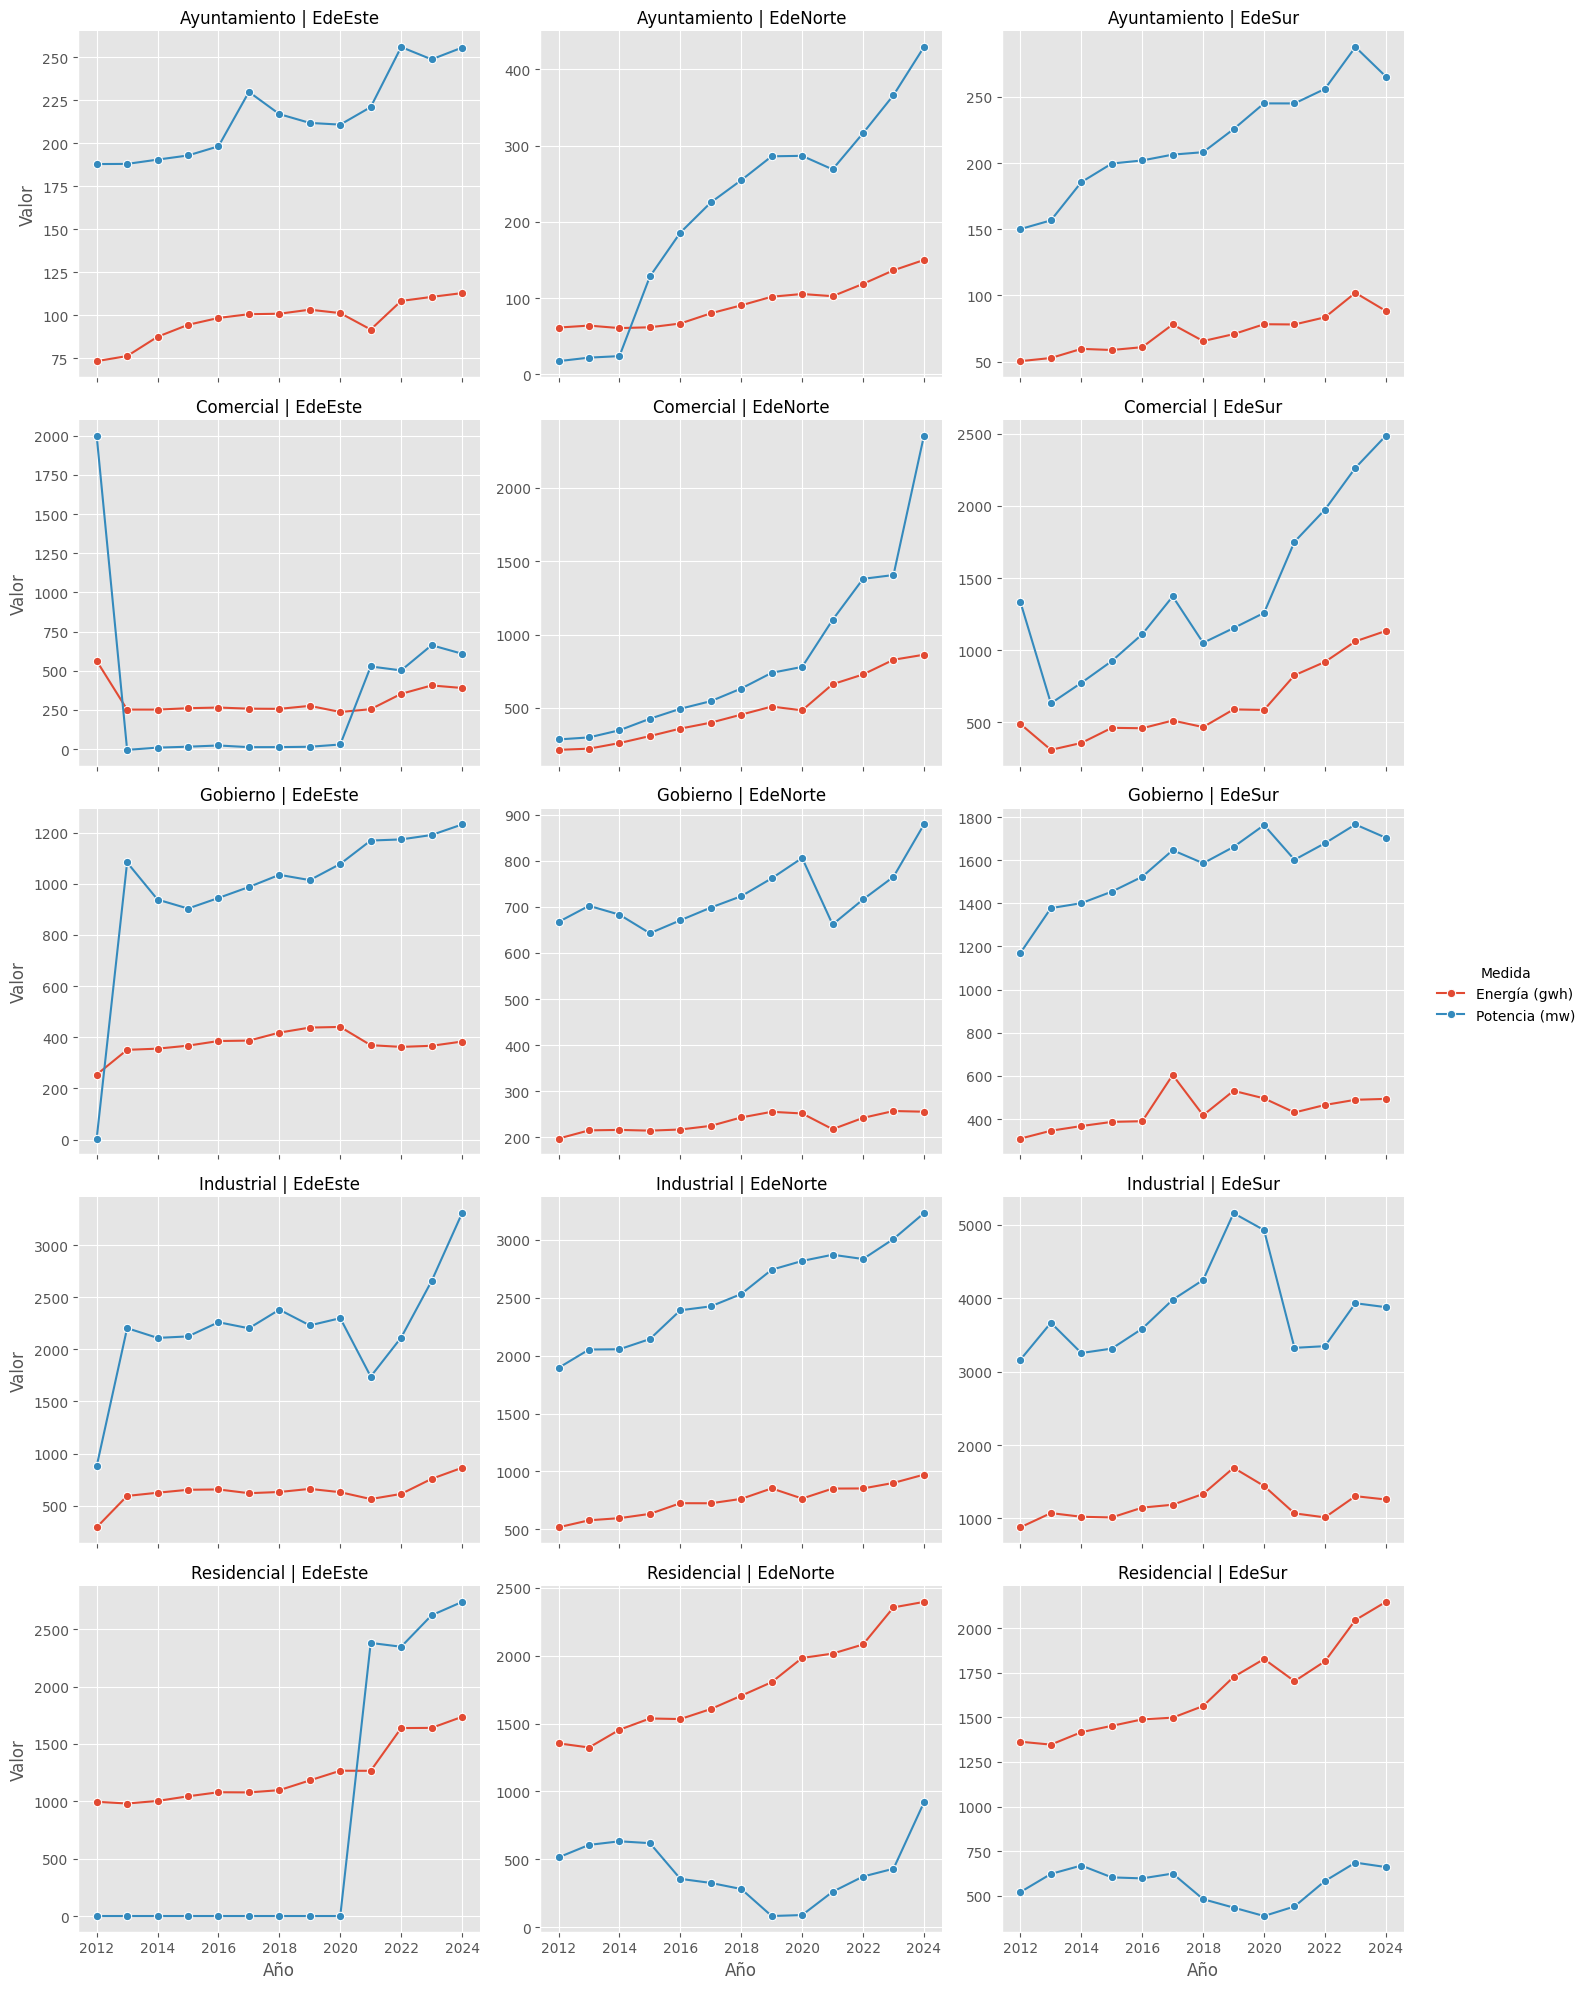

In [120]:
# Group by Empresa Distribuidora, Tipo Cliente, and Año and sum the values
yearly_trends = df.groupby(["Empresa Distribuidora", "Tipo Cliente", "Año"]).agg(
    {
        "Energía (gwh)": "sum",
        "Potencia (mw)": "sum"
    }
).reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
yearly_trends_melted = yearly_trends.melt(
    id_vars=["Empresa Distribuidora", "Tipo Cliente", "Año"],
    value_vars=["Energía (gwh)", "Potencia (mw)"],
    var_name="Medida",
    value_name="Valor"
)

# Create faceted line plots
g = sns.FacetGrid(
    yearly_trends_melted,
    col="Empresa Distribuidora",
    row="Tipo Cliente",
    hue="Medida",
    sharey=False,
    height=4,
    aspect=1.2
    )
g.map(sns.lineplot, "Año", "Valor", marker="o")
g.add_legend(title="Medida")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.tight_layout()
plt.show()

Tendencias Observadas:

Crecimiento Sostenido del Consumo: La tendencia más evidente en casi todos los gráficos es un aumento constante y significativo tanto en la potencia contratada como en el consumo de energía a lo largo de los años. Esto sugiere un crecimiento económico, demográfico y/o una mayor electrificación en el país durante ese período.

Aceleración Post-2020: En muchos sectores, especialmente en el Residencial y Comercial, se observa una aceleración o un aumento más pronunciado en la curva de crecimiento a partir de 2020-2021. Esto podría estar relacionado con la recuperación económica post-pandemia, cambios en los patrones de consumo (más tiempo en casa) o un desarrollo acelerado.

El Sector Residencial y Comercial como Motores del Crecimiento: Los gráficos de los sectores Residencial y Comercial muestran las pendientes de crecimiento más pronunciadas, indicando que son los principales impulsores del aumento de la demanda eléctrica nacional.

Comportamiento del Sector Industrial: El consumo industrial también muestra una tendencia al alza, pero con mayor volatilidad (más picos y valles) en comparación con el sector residencial. Esto es normal, ya que la actividad industrial puede estar sujeta a ciclos económicos, paradas de producción o la entrada/salida de grandes empresas.

Diferencias Regionales (entre EDEs): Aunque la tendencia general es de crecimiento para las tres distribuidoras, se pueden notar diferencias en la magnitud. Por ejemplo, la escala (eje Y) para el consumo residencial y comercial en EdeEste y EdeSur tiende a ser más alta que en EdeNorte, lo que podría reflejar la mayor densidad de población y actividad económica en sus respectivas áreas de concesión (Distrito Nacional, Santo Domingo, San Pedro de Macorís, La Romana para EdeEste; y la región sur para EdeSur).

In [121]:
df

,Empresa Distribuidora,Tipo Cliente,Mes,Año,date,Energía (gwh),Potencia (mw)
0,EdeEste,Ayuntamiento,1,2012,2012-01-01,5.455723,17.607010
1,EdeEste,Ayuntamiento,1,2013,2013-01-01,6.269137,15.787330
2,EdeEste,Ayuntamiento,1,2014,2014-01-01,6.228713,15.865480
3,EdeEste,Ayuntamiento,1,2015,2015-01-01,7.790957,16.157110
4,EdeEste,Ayuntamiento,1,2016,2016-01-01,8.268114,16.102980
...,...,...,...,...,...,...,...
2335,EdeSur,Residencial,12,2020,2020-12-01,137.600105,31.510346
2336,EdeSur,Residencial,12,2021,2021-12-01,141.045316,35.980329
2337,EdeSur,Residencial,12,2022,2022-12-01,147.231416,57.268129
2338,EdeSur,Residencial,12,2023,2023-12-01,159.370000,59.190000


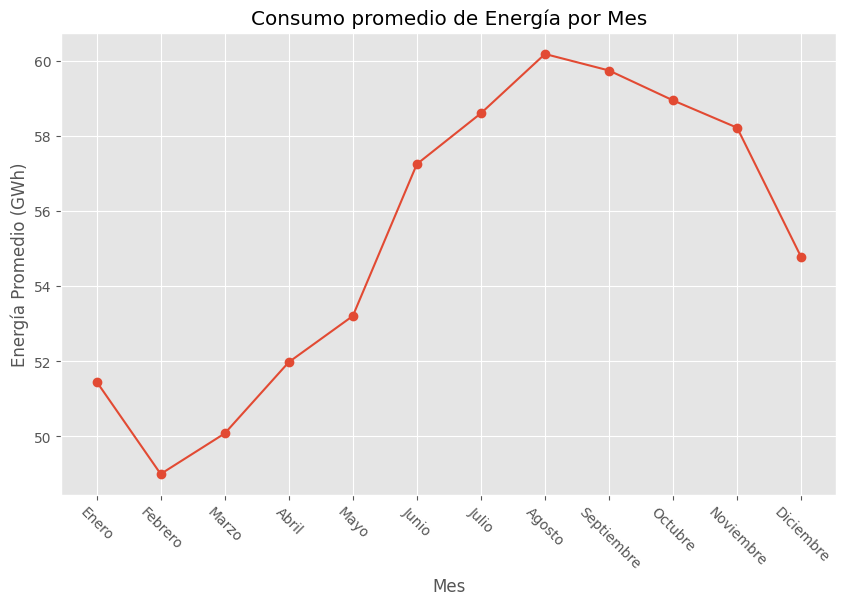

In [122]:
# Agrupar por mes y calcular promedio
promedio_mes = df.groupby("Mes")["Energía (gwh)"].mean()

# Graficar
plt.figure(figsize=(10,6))
plt.plot(promedio_mes.index, promedio_mes.values, marker="o")
plt.title("Consumo promedio de Energía por Mes")
plt.xticks(range(1, 13), ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], rotation=315)
plt.xlabel("Mes")
plt.ylabel("Energía Promedio (GWh)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


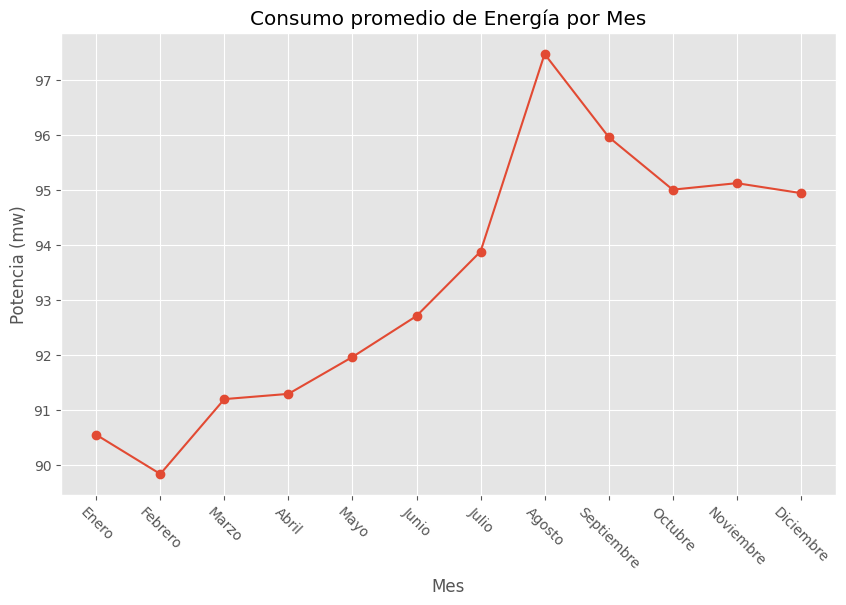

In [123]:
# Agrupar por mes y calcular promedio
promedio_mes = df.groupby("Mes")["Potencia (mw)"].mean()

# Graficar
plt.figure(figsize=(10,6))
plt.plot(promedio_mes.index, promedio_mes.values, marker="o")
plt.title("Consumo promedio de Energía por Mes")
plt.xticks(range(1, 13), ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], rotation=315)
plt.xlabel("Mes")
plt.ylabel("Potencia (mw)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

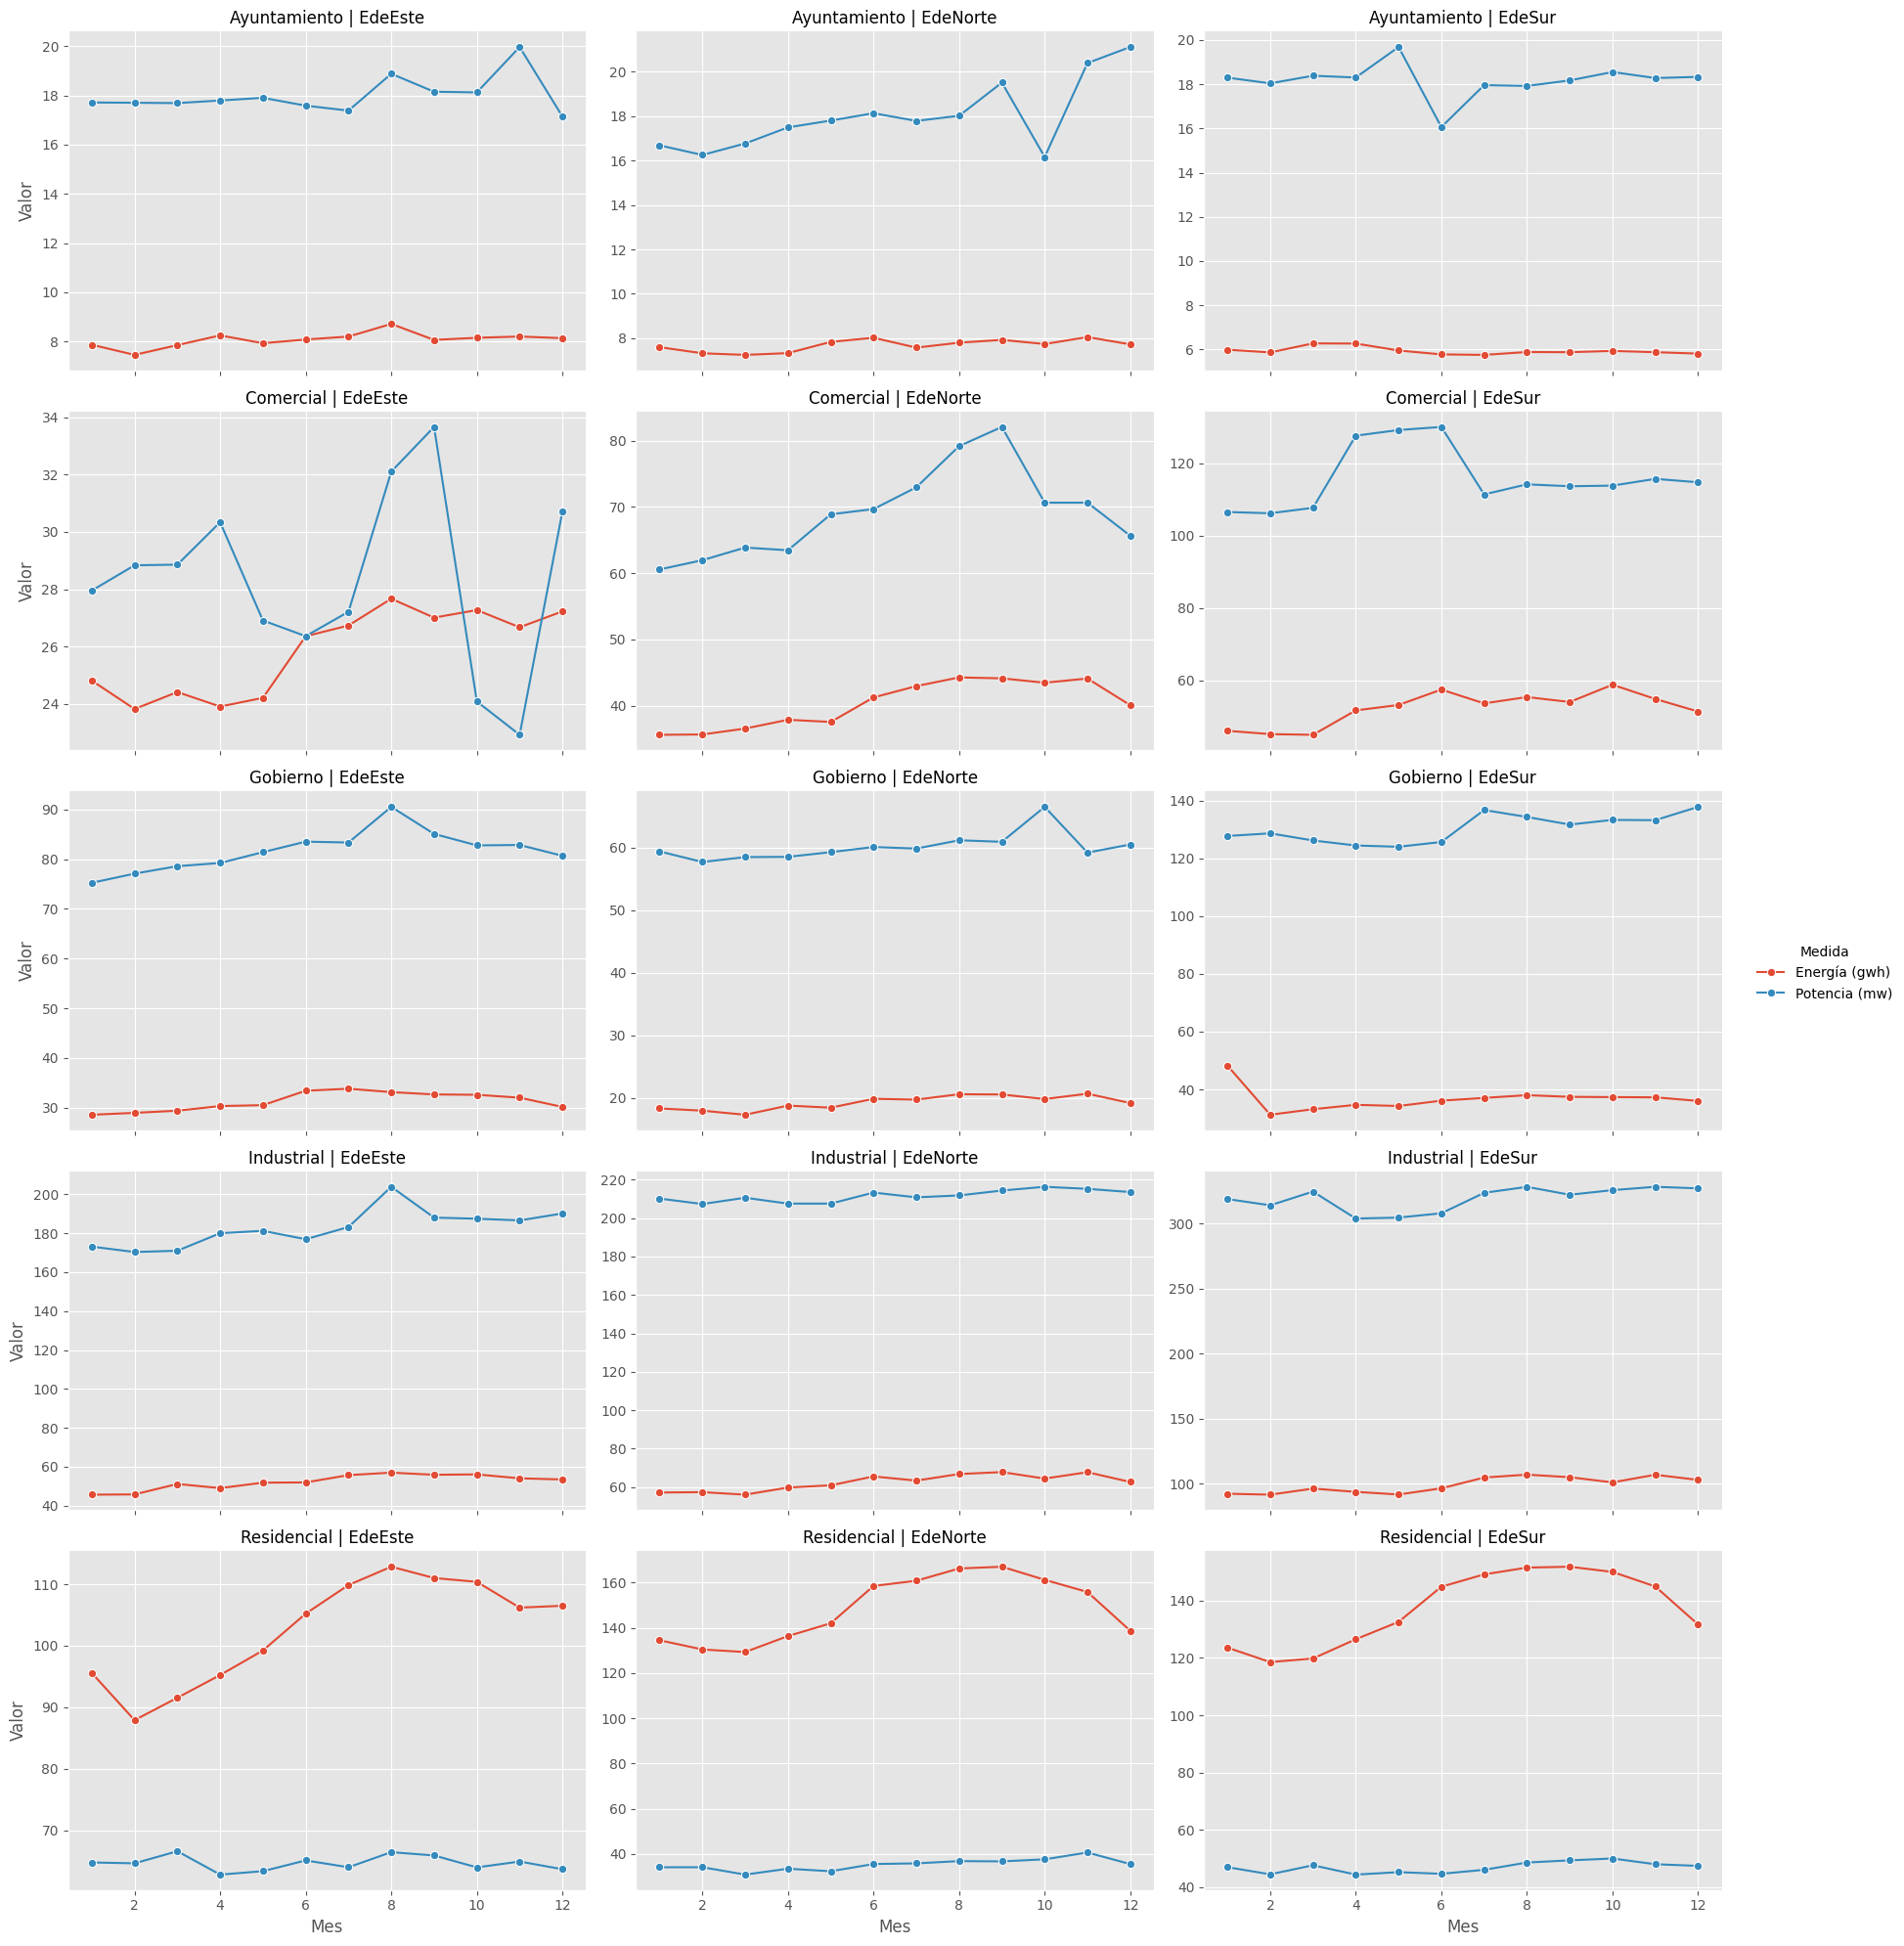

In [124]:
# Group by Empresa Distribuidora, Tipo Cliente, and Mes and mean the values
monthly_trends = df.groupby(["Empresa Distribuidora", "Tipo Cliente", "Mes"]).agg(
    {
        "Energía (gwh)": "mean",
        "Potencia (mw)": "mean"
    }
).reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
monthly_trends_melted = monthly_trends.melt(
    id_vars=["Empresa Distribuidora", "Tipo Cliente", "Mes"],
    value_vars=["Energía (gwh)", "Potencia (mw)"],
    var_name="Medida",
    value_name="Valor"
)

# Create faceted line plots
g = sns.FacetGrid(
    monthly_trends_melted,
    col="Empresa Distribuidora",
    row="Tipo Cliente",
    hue="Medida",
    sharey=False,
    height=4,
    aspect=1.5
    )
g.map(sns.lineplot, "Mes", "Valor", marker="o")
g.add_legend(title="Medida")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.tight_layout()
plt.show()

# Tendencias de consumo eléctrico entre distribuidoras en República Dominicana para optimizar operaciones empresariales

## Resultados y conclusiones

### 1. Ajuste de Horarios de Producción y Operación

En los residenciales y comerciales se nota que la energía sube mucho en meses de calor (verano). Una empresa que produce o da servicio en esas zonas puede mover operaciones pesadas (refrigeración, manufactura, logística) a horarios con menos carga para ahorrar costos y evitar cortes.

### 2. Priorización de Inversiones Regionales

Notar que en EdeSur y EdeNorte los sectores Comercial e Industrial jalan más energía que en EdeEste. Una cadena de supermercados o una empresa de manufactura puede priorizar invertir en eficiencia energética en esas regiones porque ahí están los mayores gastos.

### 3. Segmentación de Clientes para Nuevos Servicios

Las empresas que venden soluciones de eficiencia (paneles solares, plantas, baterías, consultorías) pueden ver qué tipo de cliente consume mas energia. Ejemplo: el sector Residencial en EdeNorte y EdeSur crece mucho en energía, ideal para vender soluciones de autoconsumo solar.

### 4. Gestión de Riesgos en Picos de Potencia

Aunque la energía manda la factura, la potencia es lo que rompe el sistema. En sectores industriales, los picos de potencia (aunque no sean tan constantes) presionan la red. Las empresas pueden:

- Negociar contratos especiales con la distribuidora.

- Instalar sistemas de respaldo o baterías para aplanar esos picos.

### 5. Optimización de Cadena de Suministro

Con estos datos, empresas de logística y retail pueden identificar cuándo y dónde se mueve más actividad económica (reflejada en electricidad) y reubicar inventario o reforzar rutas.

In [125]:
df.to_csv("Data_consumo_Edesur_2012-2024.csv", index=False)